The German Tank Problem
===

```
According the report: the front army had destroyed the Germany tanks, with serial numbers are 3, 21, 30, 87, and 115. Intelligence office wants to know how many tanks Germany had made.
```


During World War 2, the Western Allies used a simple formula to estimate the rate at which German tanks were being produced, based on the serial numbers obtained from captured and destroyed tanks. 
 
The formula is the following:
---
Minimum-Variance Unbiased Estimator (MVUE) describes the solution:

$$ \hat N = m+\frac{m}{n}-1$$
where $\hat N$ is the estimated number, $m$  is the largest sampled serial number, and $n$  is the sample size (e.g. the number of captured/destroyed German tanks).

For example, let’s say 10 tanks were captured/destroyed, and the following serial numbers were obtained:
117, 232, 122, 173, 167, 12, 168, 204, 4, 229. 

Then the estimated number is:
$$\hat N = 232+\frac{232}{10}-1\approx 253$$

Fact
---
After the war, German production figures showed the actual number to be 245, and the estimated were listed as follows:
```
  Month 	German Records    Statistical Estimate	Intelligence Estimate
June 1940     122                   169	               1000	
June 1941     271                   244	               1550	
August 1942   342                   327	               1550	

```

Exercise
---
Design a test by using MVUE.

In [1]:
from numpy import random
import numpy as np

In [9]:
random.randint(1,100,5)

array([29, 25,  1, 36, 16])

In [5]:
98+98/5-1

116.6

In [34]:
maxima = []

# Generate 100 maxima
for i in range(100):
    # Generate a list of five random integers between 1 and 100
    numbers = [random.randint(1, 100) for _ in range(5)]
    # Append the maximum of the list to the maxima list
    maxima.append(max(numbers))

In [35]:
Estimate= [ i+i/5-1 for i in maxima ]

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

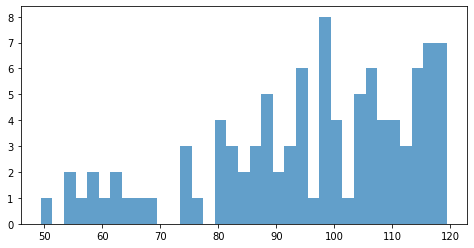

In [52]:
plt.figure(figsize=(8,4))
bin_width = 2

a=min(Estimate)
b=max(Estimate)
bins=np.arange(a, b + bin_width, bin_width)
plt.hist(Estimate,bins=bins,alpha=0.7);
#plt.hist(Estimate,bins=20);

In [54]:
# Estimator

int(np.mean(Estimate))

95

Here, we use **Law of Large Number** to get the estimate population mean.

Probability
---
Suppose that $ X_1,X_2, \cdots,X_n$ are independent identically distributed random variables with finite first moment, i.e. $E|X_i|>\infty$. 

<b>Central Limit Theorem, Gauss<b>:

$$\frac{X_i-\mu}{\sigma}\propto N(0,1)$$
where $ \mu,\sigma^2$ are mean and variance of population, and $N(0,1)$ is standard normal distribution.

However, $\mu,\sigma^2$ are unknown parameters to us. To get the information of them, we use <b>the Law of Large Number</b> to estimate:

$$ \bar X=\frac{\sum_{i=1}^n X_i}{n}\to \mu$$    

In other words, we use the sample mean,  $ \bar X$, to replace the unknown population mean, $\mu$, if sample size is large enough. 

By the way, we want to estimate  the sample variance, $\sigma^2$, too. By simple computation,
\begin{eqnarray}
    E(X_i-\mu)^2 &=& \sigma^2, \text{ (by definition)}\\
    \Rightarrow E \left(\sum_{i=1}^n(X_i -\mu)^2\right)&=&\sum_{i=1}^nE(X_i-\mu)^2\\
                 &=&n\sigma^2\\
    \Rightarrow \frac{1}{n}\sum_{i=1}^n(X_i -\mu)^2&=&\sigma^2
\end{eqnarray} 
so called unbiased variance of $\bar X$. But as mentioned before, $\mu$ is unknown, we can not use an unknown to compute the sample variance. Thus re-consider the following, by replacing $\mu$ by $\bar X$ since $\bar X\to \mu$:
\begin{eqnarray}
    E\left(\sum_{i=1}^n\left(X_i-\bar X)^2\right)\right) &=& 
            E\left(\sum_{i=1}^n\left(X_i-\mu-(\bar X-\mu)\right)^2\right)\\
    &=&\sum_{i=1}^n\left(E(X_i-\mu)^2+2E(X_i-\mu)(\bar X-\mu)+E(\bar X-\mu)^2\right)\\
                 &=&n\sigma^2-2\sigma^2+\sigma^2=(n-1){\sigma^2}\\
\end{eqnarray}  
This means
1. biased estimator of $\sigma^2$:
    $$\hat{\sigma^2}=\frac{1}{n}\sum_{i=1}^n(X_i-\bar X)^2\Rightarrow E\hat{\sigma^2}=\frac{n-1}{n}\sigma^2\neq\sigma^2$$
2. unbiased estimator of $\sigma^2$:
    $$\hat{\sigma^2}=\frac{1}{n-1}\sum_{i=1}^n(X_i-\bar X)^2\Rightarrow E\hat{\sigma^2}=\frac{n-1}{n-1}\sigma^2=\sigma^2$$

Example 
---
Take 1000 samples from continuous uniform[0,1]=$U[0,1]$. Mean and variance of $U[0,1]$ are $1/2, 1/12$ respectively.

In [22]:
# Biased Sample variance

def biased(U,mu=1/2):
    return sum((U-mu)**2)/len(U)

In [26]:
# U[0,1], uniform distribution on [0,1]
size=[10,50,100,200,500,1000]
print("True Mean: %6.5f, True Variance:%6.5f" %(1/2,1/12))
for s in size:
    U=random.uniform(0,1,s)
    print("sample size: %s,\n mean: %6.5f, unbiased variance: %6.5f, biased variance: %6.5f" %(s,U.mean(),U.var(),biased(U,mu=1/2)))

True Mean: 0.50000, True Variance:0.08333
sample size: 10,
 mean: 0.62232, unbiased variance: 0.07531, biased variance: 0.09027
sample size: 50,
 mean: 0.52685, unbiased variance: 0.06034, biased variance: 0.06106
sample size: 100,
 mean: 0.47948, unbiased variance: 0.08004, biased variance: 0.08046
sample size: 200,
 mean: 0.49060, unbiased variance: 0.08277, biased variance: 0.08286
sample size: 500,
 mean: 0.50288, unbiased variance: 0.08460, biased variance: 0.08461
sample size: 1000,
 mean: 0.50773, unbiased variance: 0.07962, biased variance: 0.07968


In [28]:
# N(0,1), standard normal distribution
random.normal(0,1,5)

array([-1.66995132,  1.31504485, -0.62589168, -2.1163909 , -0.03516623])

In [29]:
size=[10,50,100,200,500,1000]
print("True Mean: %6.5f, True Variance:%6.5f" %(0,1))
for s in size:
    U=random.normal(0,1,s)
    print("sample size: %s,\n mean: %6.5f, unbiased variance: %6.5f, biased variance: %6.5f" %(s,U.mean(),U.var(),biased(U,mu=0)))

True Mean: 0.00000, True Variance:1.00000
sample size: 10,
 mean: 0.14955, unbiased variance: 1.04542, biased variance: 1.06778
sample size: 50,
 mean: -0.22349, unbiased variance: 1.01745, biased variance: 1.06739
sample size: 100,
 mean: 0.08482, unbiased variance: 0.94789, biased variance: 0.95508
sample size: 200,
 mean: 0.02809, unbiased variance: 1.04917, biased variance: 1.04996
sample size: 500,
 mean: 0.04294, unbiased variance: 1.03261, biased variance: 1.03445
sample size: 1000,
 mean: -0.04059, unbiased variance: 0.94282, biased variance: 0.94447
